# Angle subtended on the slicer by each MRS detector pixel in each spectral band

The angle subtended by each pixel on the sky depends on the distortion affecting the pixel. It also depends on the MRS spectral channel. The four MRS channels have different field of view extents.

In [1]:
import funcs

import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# Define paths to data
workDir   = '/Users/ioannisa/Desktop/python/miri_devel/'
cdpDir    = workDir+'cdp_data/'
d2cMapDir = workDir+'distortionMaps/'
lvl2path  = workDir+'FM_data/LVL2/'

In [3]:
sliceMap,pixsiz_img = {},{}
for band in ['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']:
    # Load slice mask extension of distortion map
    sliceMap[band]   = funcs.load_obj('d2cMaps_band{}'.format(band),path=d2cMapDir)['sliceMap']
    pixsiz_img[band] = funcs.get_cdps(band,cdpDir,output='img')[2]

<IPython.core.display.Javascript object>


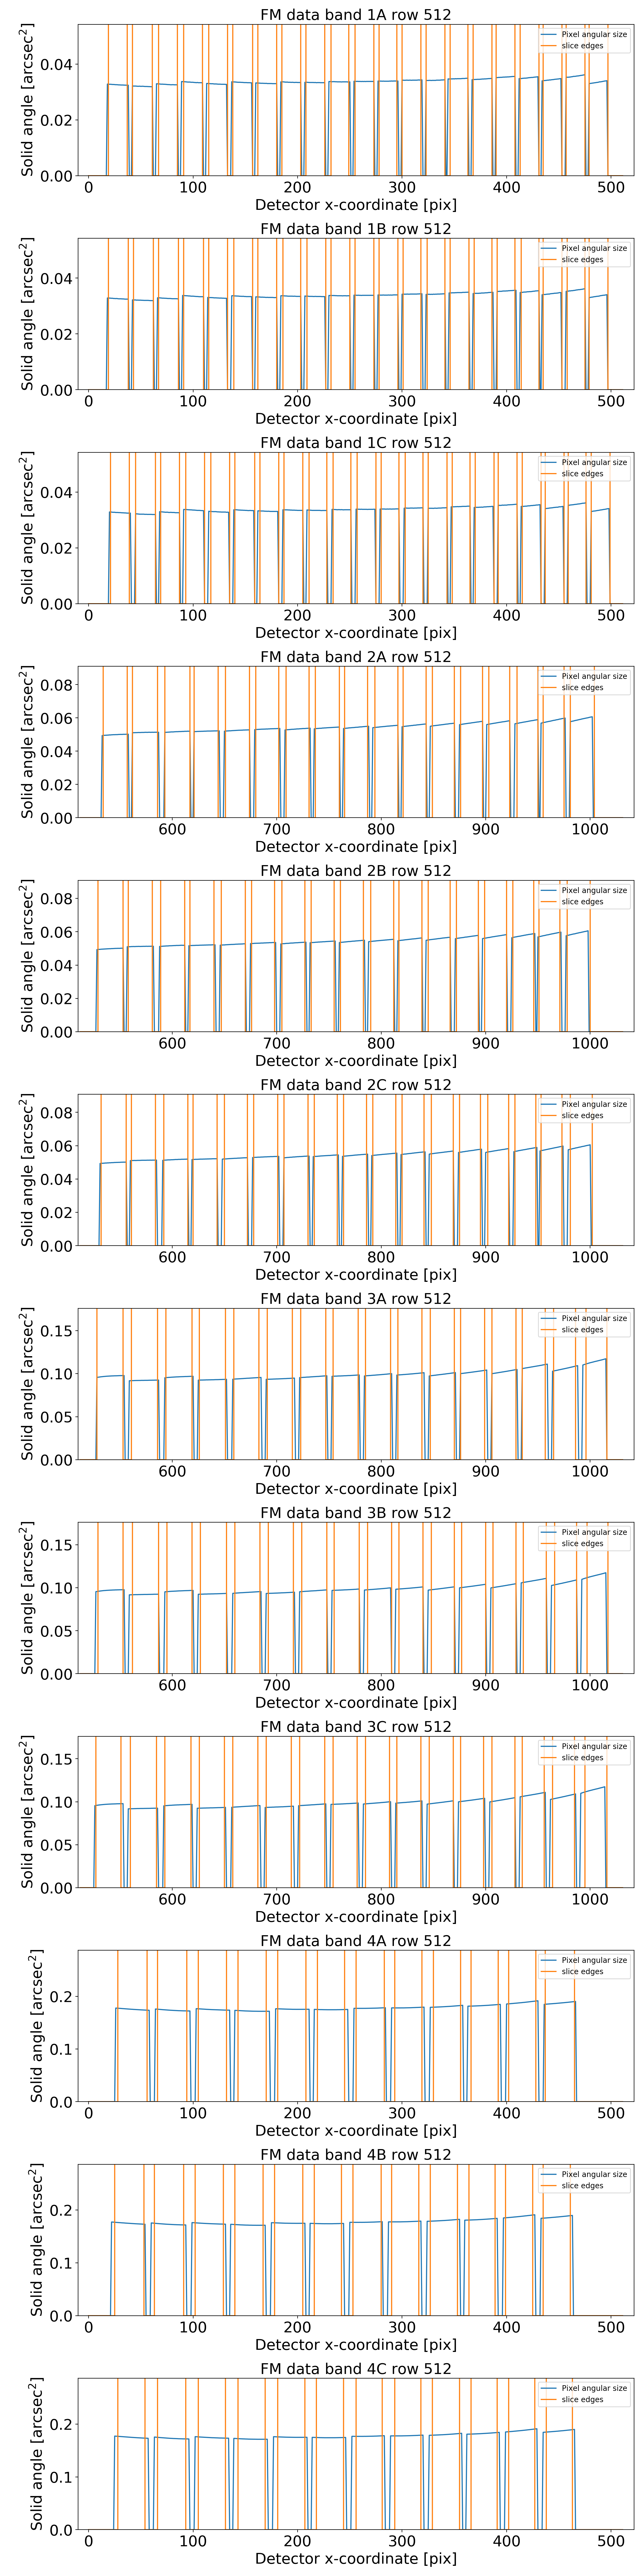

In [4]:
plt.close('all')
fig,axs = plt.subplots(12,1,figsize=(12,48))
for plot,band in enumerate(['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']):
    axs[plot].set_title('FM data band {} row 512'.format(band),fontsize=20)
    if band[0] in ['1','4']:
        axs[plot].plot(pixsiz_img[band][512,:512],label='Pixel angular size')
        axs[plot].plot(sliceMap[band][512,:512],label='slice edges')
        axs[plot].set_ylim(0,1.5*np.max(pixsiz_img[band][512,:512][~np.isnan(pixsiz_img[band][512,:512])]))
        axs[plot].set_xlim(-10,522)
    elif band[0] in ['2','3']:
        axs[plot].plot(512+np.arange(len(pixsiz_img[band][512,512:])),pixsiz_img[band][512,512:],label='Pixel angular size')
        axs[plot].plot(512+np.arange(len(sliceMap[band][512,512:])),sliceMap[band][512,512:],label='slice edges')
        axs[plot].set_ylim(0,1.5*np.max(pixsiz_img[band][512,512:][~np.isnan(pixsiz_img[band][512,512:])]))
        axs[plot].set_xlim(510,1042)
    axs[plot].set_xlabel('Detector x-coordinate [pix]',fontsize=20)
    axs[plot].set_ylabel(r'Solid angle [arcsec$^2$]',fontsize=20)
    axs[plot].legend(loc='upper right',fontsize=10)
    axs[plot].tick_params(axis='both',labelsize=20)
plt.tight_layout()

<IPython.core.display.Javascript object>


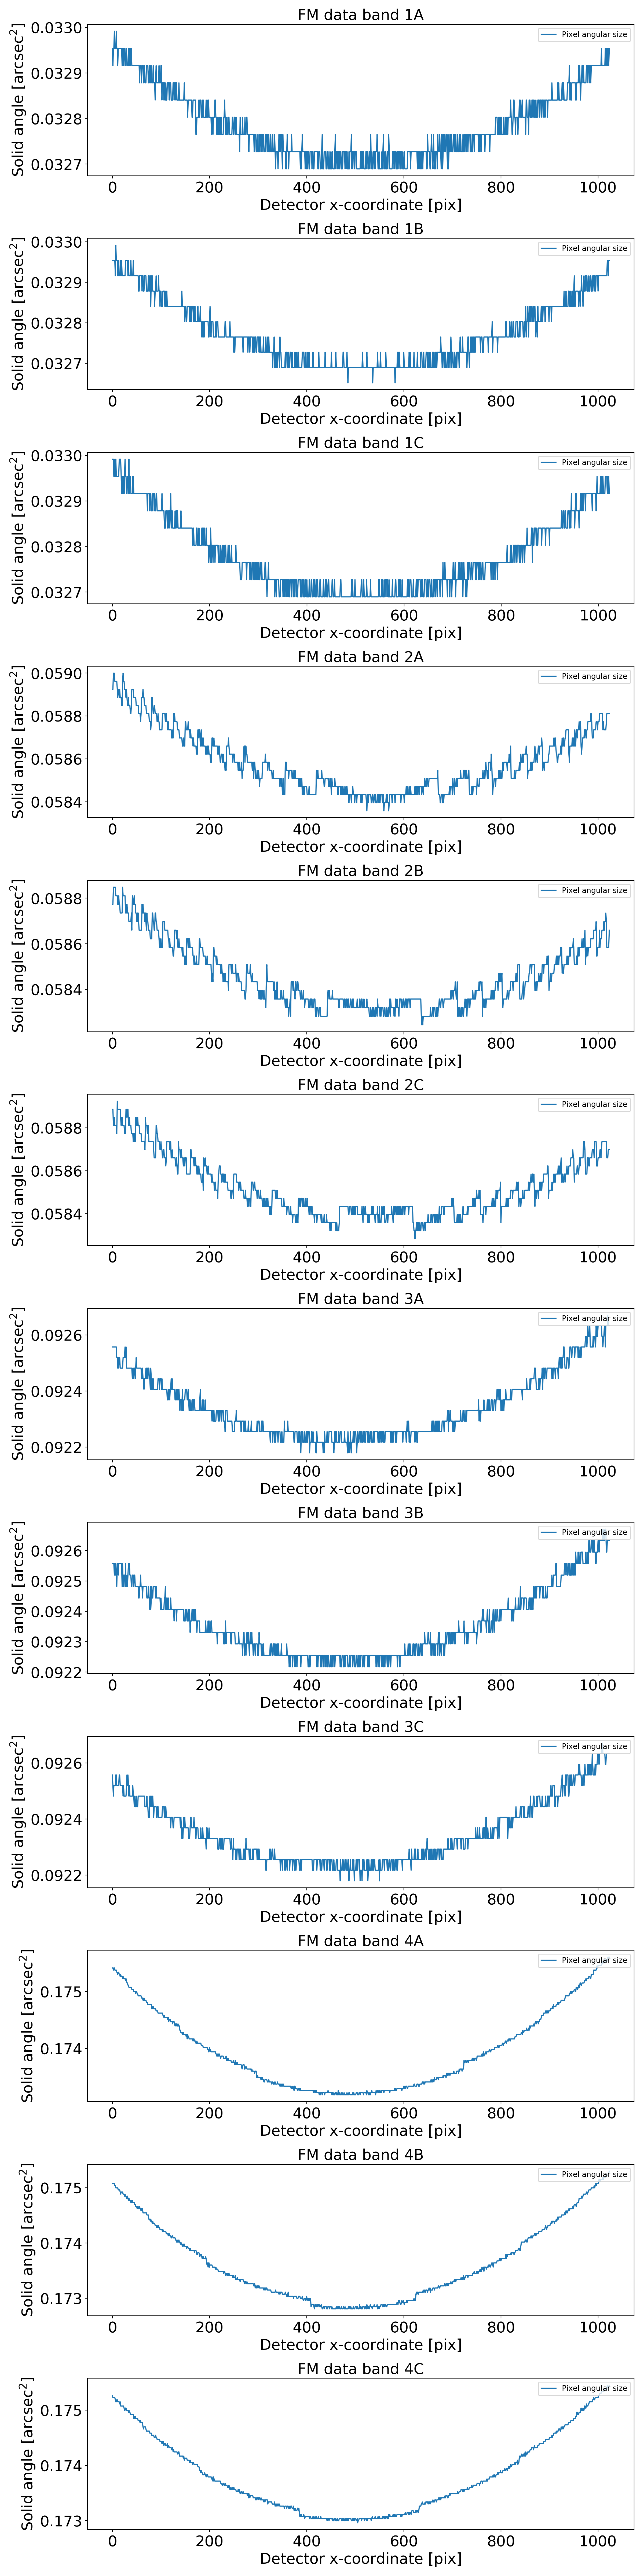

In [8]:
plt.close('all')
fig,axs = plt.subplots(12,1,figsize=(12,48))
for plot,band in enumerate(['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']):
    axs[plot].set_title('FM data band {}'.format(band),fontsize=20)
    d2cMaps = funcs.load_obj('d2cMaps_band{}'.format(band),path=d2cMapDir)
    ypos,xpos = funcs.detpixel_trace(band,d2cMaps,sliceID=d2cMaps['nslices']/2,alpha_pos=0)
    axs[plot].plot(pixsiz_img[band][ypos,xpos][np.nonzero(pixsiz_img[band][ypos,xpos])],label='Pixel angular size')
    axs[plot].set_xlabel('Detector x-coordinate [pix]',fontsize=20)
    axs[plot].set_ylabel(r'Solid angle [arcsec$^2$]',fontsize=20)
    axs[plot].legend(loc='upper right',fontsize=10)
    axs[plot].tick_params(axis='both',labelsize=20)
plt.tight_layout()